In [56]:
import datatable as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from time import time
from datatable import f
%matplotlib inline

In [2]:
report = []

for n in [1000, 10000, 100000, 1000000, 10**7, 10**8]:
    data = np.random.randint(1_000_000, size=n, dtype="int32")
    df0 = dt.Frame(data)
    pf0 = pd.DataFrame(data)
    for lib, df in [("datatable", df0), ("pandas", pf0)]:
        t0 = time()
        if isinstance(df, dt.Frame):
            res = df.sort(0)
        else:
            res = df.sort_values(0)
        t1 = time()
        report.append([lib, n, t1 - t0])
        print("[%-9s]: n=%d  time=%f" % (lib, n, t1 - t0))


[datatable]: n=1000  time=0.000436
[pandas   ]: n=1000  time=0.001500
[datatable]: n=10000  time=0.000409
[pandas   ]: n=10000  time=0.001670
[datatable]: n=100000  time=0.004375
[pandas   ]: n=100000  time=0.013058
[datatable]: n=1000000  time=0.024522
[pandas   ]: n=1000000  time=0.171986
[datatable]: n=10000000  time=0.255568
[pandas   ]: n=10000000  time=2.147305
[datatable]: n=100000000  time=1.485536
[pandas   ]: n=100000000  time=35.536640


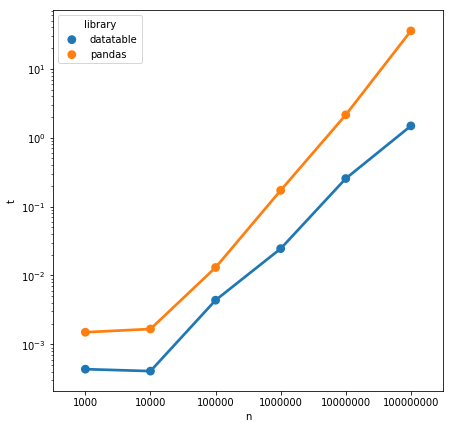

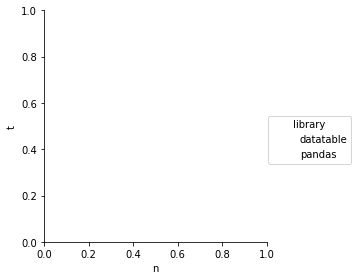

In [3]:
data = pd.DataFrame(report, columns=["library", "n", "t"])
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
_ = sns.factorplot(x="n", y="t", hue="library", data=data, ax=ax)

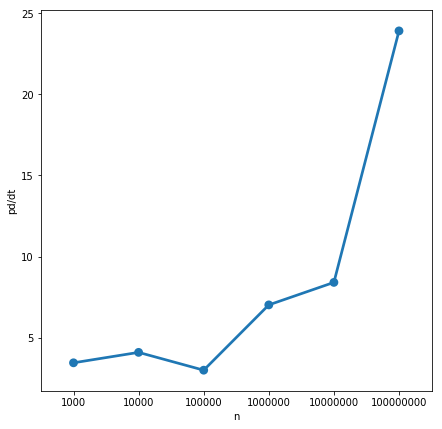

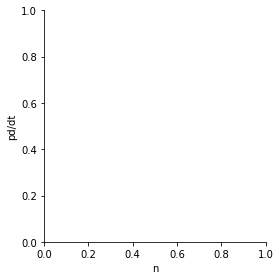

In [61]:
df1 = dt.Frame(data)
df2 = dt.Frame().cbind(
  df1[f.library == "datatable", {"n": f.n, "dt": f.t}],
  df1[f.library == "pandas", {"pd": f.t}]
)
df3 = df2[:, {"n": f.n, "pd/dt": f.pd / f.dt}]
_, ax = plt.subplots(figsize=(7, 7))
sns.factorplot(x="n", y="pd/dt", data=df3.topandas(), ax=ax)

In [62]:
df3

             n     pd/dt
---  ---------  --------
 0        1000   3.44013
 1       10000   4.08397
 2      100000   2.98469
 3     1000000   7.01359
 4    10000000   8.4021 
 5   100000000  23.9218 

[6 rows x 2 columns]
